# Stock Price Movement Charts using Python

This purpose of this project was to create stock price movement charts with widgets for interactivity using the available python libraries.


# Price Movement Charts

Price movement charts help with timing the market for buying or selling opportunities by determining up and down trends in price movement. These charts can typically be used with any financial time series like stocks, bonds, options, futures or commodities.

##  Renko 

Is a type of price movement chart that has no time dimension. The key parameter it requires is the box size which signifies each brick (price movement size). The box size can be set to a specific value, or it be set to be equal to the ATR (average true range) which is derived from the closing price of the stock. With these charts its able to quickly tell the direction of trend changes.

## PNF

PNF otherwise known as Point and Figure Chart is very similar to the renko chart, in that it also does not have a time dimension. An X represents when the price has moved higher, and an O represents when the price has dropped. The PNF also has a box size that can be set as a specific value, or be equal to the ATR (average true range).

## OHLC 
This is a type of price movement chart that captures the open, high, low and closing prices for each given trading day.

The vertical line represents the range in prices from high to low for the day. The horizontal lines extending out from the vertical line, represents open price for the left, and close price for the right.
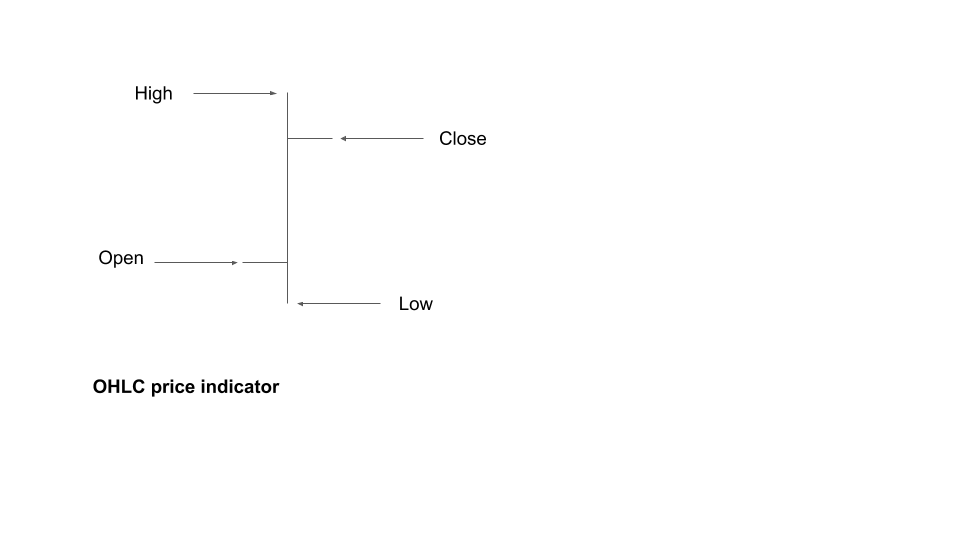

## Candlestick

Also known as Japanese candlesticks are a type of price movement chart that takes into consideration both price, time and volume. It helps to determine the sentiment of the market - Bullish or Bearish. Bullish - would indicate a buy, while Bearish - would indicate short or sell for a stock trader.

Candlestick patterns can help determine price direction and momentum. One key thing to note when using candlesticks to understand price movement, it is important to first identify the market trend, before finding candlestick patterns in the data. Candlestick patterns are also best suited for identifying short term price movements.

### Long and short days

Long days refers to large price movement within the trading day, and short days refers to low price movement within the trading day. This comparison however is best suited for short-term price movement of about 5-10days.
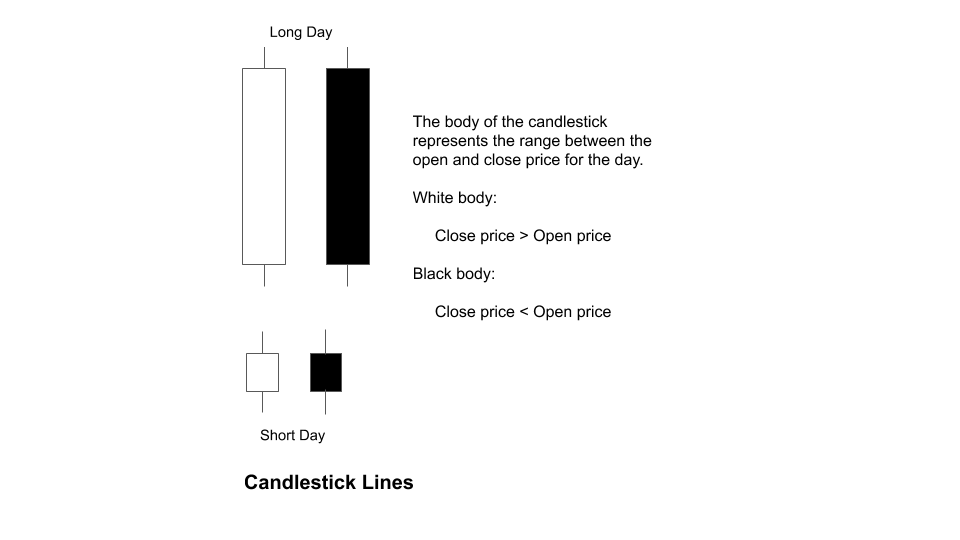

# Load required libraries

*  *Pandas_datareader* to import historical data on stocks from yahoo.
*   *Pandas* for working with large data sets. 
*   *Datetime* for handling date datatypes.
*   *Matplotlib* for data visualization.
*   *ipwidgets* for interactive widgets
*   *Numpy* for handling numeric arrays.
*   *mplfinance* for creating price movement charts








In [1]:
!pip install mplfinance

In [2]:
from pandas_datareader import data
import numpy as np
from datetime import datetime 
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import ipwidgets library and functions
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

import mplfinance as mpf
mpf.__version__



'0.12.7a0'

# Create widgets and dataframe for the stock data


*Instructions for use. *
1.   Insert tuple of stock list.  
2.   Select stock from dropdown. 
3.   Select number of calendar days for dates from the last trading day. 
4.   Rerun all code after.



## Create widget for stock list and number of calendar days


In [3]:
# Insert a tuple of unique tickers into the options variables.
options = ('MMM', 'AOS', 'AAN', 'ABB', 'ABT', 'ABBV', 'ABM', 'ACN', 'AYI', 'GOLF', 'ADCT', 'ADT', 'AAP', 'ADSW', 'WMS', 'ACM', 'AEG', 'AER', 'AJRD', 'AMG', 'AFL', 'AGCO', 'A', 'AEM', 'ADC', 'AL', 'APD', 'AGI', 'ALK', 'ALB', 'ACI', 'AA', 'ALC', 'ARE', 'AQN', 'BABA', 'Y')

# create dropdown for selected stocks
stock_ticker = widgets.Dropdown(
    options= options,
    description='Select Stock Ticker',
    disabled=False,
    style = {'description_width': 'initial'}, 
    layout = {'width': '200px'}
)

# create selection slider for days
w = widgets.IntSlider(
    value=90,
    min=5,
    max=365,
    step=1,
    description = 'Calendar days',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style = {'description_width': 'initial','handle_color' : 'blue'}, 
    layout = {'width': '400px'}
)

# create function for time frame of selected calendar days from today
def timeframe(w):
    days = timedelta(w)
    start = date.today() - days
    today = date.today()
    print('Start Date: ',start, '                 ' ,'Last Date: ',today)
       
dates = widgets.interactive_output(timeframe, {'w': w} )

display(stock_ticker, w, dates)

Dropdown(description='Select Stock Ticker', layout=Layout(width='200px'), options=('MMM', 'AOS', 'AAN', 'ABB',…

IntSlider(value=90, continuous_update=False, description='Calendar days', layout=Layout(width='400px'), max=36…

Output()

## Download data for the stock 

In [7]:
# create text to show stock ticker 

v = widgets.Text(
    value=stock_ticker.value,
    description='Stockticker:',
    disabled=True
)

# create function to load stock data from yahoo 
def load_stock_data(stock_ticker, w):
    start = date.today() - timedelta(w)
    today = date.today()
    stock_data = data.DataReader(stock_ticker, start=start, end=today,
                       data_source='yahoo')
    return stock_data

# create dataframe for selected stock
stock = load_stock_data(stock_ticker.value, w.value)

# display ticker and dataframe

display(v, stock)

Text(value='BABA', description='Stockticker:', disabled=True)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-10,251.750000,246.100006,249.339996,248.130005,13621700,248.130005
2020-08-11,252.880005,247.830002,251.289993,248.419998,10681800,248.419998
2020-08-12,256.079987,248.679993,249.250000,255.190002,11120400,255.190002
2020-08-13,256.970001,252.880005,256.390015,253.720001,8794500,253.720001
2020-08-14,255.770004,251.639999,255.490005,253.970001,7876400,253.970001
2020-08-17,257.375000,250.085007,253.000000,256.959991,9760000,256.959991
2020-08-18,261.420013,256.059998,258.709991,259.200012,13267800,259.200012
2020-08-19,261.290009,257.380005,260.890015,260.589996,14096500,260.589996
2020-08-20,258.880005,254.179993,256.890015,257.970001,21460800,257.970001


# Visualize percentage daily changes for the selected stock over time

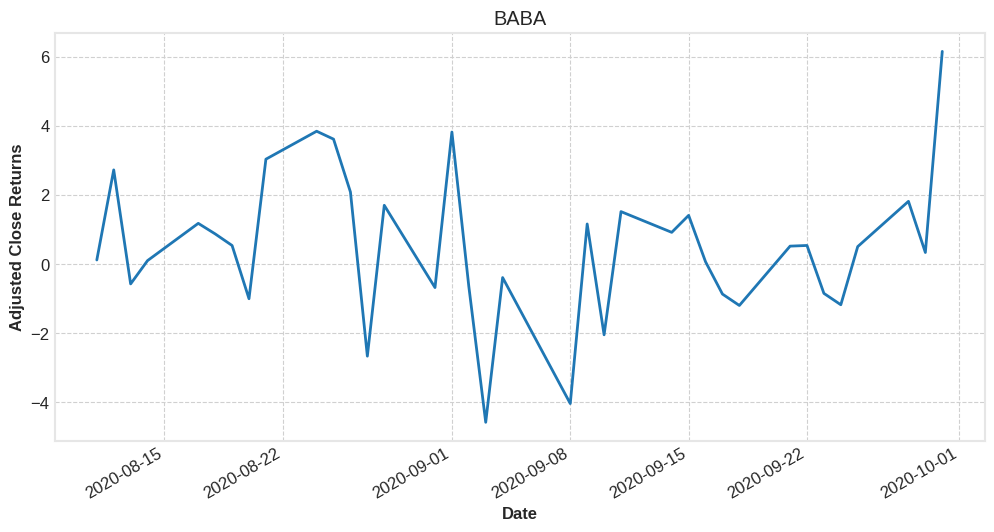

In [8]:
# show returns using Adj Close for the selected stock
stock_data_return = stock['Adj Close'].pct_change().mul(100)
stock_data_return.plot(figsize=[12,6], grid=True, title = stock_ticker.value)
plt.ylabel("Adjusted Close Returns")

plt.show()

# Visualise the stock price data using different price movement indicators

*Instruction for use.*
1. Select Chart Type and style. 

All the charts assume 10, 20 or 50 days for moving average

In [9]:
# create dropdown for selected chart-type

chart_types = [('Line Price Chart', 'line'),
               ('Renko Price Chart', 'renko'), 
               ('PNF Price Chart','pnf'),
               ('Candlestick Price Chart', 'candle'),
               ('OHLC Price Chart', 'ohlc')]

chart = widgets.Dropdown(
    options= chart_types,
    description='Select Chart Type',
    disabled=False,
    style = {'description_width': 'initial'}, 
    layout = {'width': '300px'}
)

# create drop down using mplfinance library built-in styles

style_options = ['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

style_option = widgets.Dropdown(
    options= style_options,
    description='Select Style',
    disabled=False,
    style = {'description_width': 'initial'}, 
    layout = {'width': '300px'}
)

# create plot function using mplfinance library 
# fixed values for moving average (mav), figratio, and figscale, volume=True
# default settings for renko and pnf charts (bricksize = 'atr', box_size='atr')


def create_plot(chart, style_option):
    return mpf.plot(stock, type=chart, volume=True, mav = (10,20,50), figratio=(15, 8) , figscale=1.5, style=style_option, title = '\n'f'{stock_ticker.value}')
widgets.interactive(create_plot, chart=chart, style_option=style_option) 

interactive(children=(Dropdown(description='Select Chart Type', layout=Layout(width='300px'), options=(('Line …

# References

1.   [mplfinance](https://github.com/matplotlib/mplfinance)

2.   [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/)

3.   [Datareader basic example (Yahoo Finance)](https://riptutorial.com/pandas/example/6232/datareader-basic-example--yahoo-finance-)

4.   Morris, Gregory L., 1948-, Candlestick charting explained timeless 
techniques for trading stocks and futures [electronic resource], New York : McGraw-Hill, c2006, 3rd ed.

5.   [Price Movement Charts](https://github.com/matplotlib/mplfinance/blob/master/examples/price-movement_plots.ipynb)

6.   [Renko Charts](https://www.investopedia.com/terms/r/renkochart.asp)

7.   [PNF Charts](https://www.investopedia.com/terms/p/pointandfigurechart.asp)









